In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

In [37]:
data = pd.read_csv('diabetes2.csv')

In [38]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
data.dropna(inplace=True)

In [40]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
data['diabetes'] = data['Outcome'].apply(lambda x:True if x==1 else False)

In [42]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False
766,1,126,60,0,0,30.1,0.349,47,1,True


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   diabetes                  768 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 54.9 KB


In [44]:
data.shape

(768, 10)

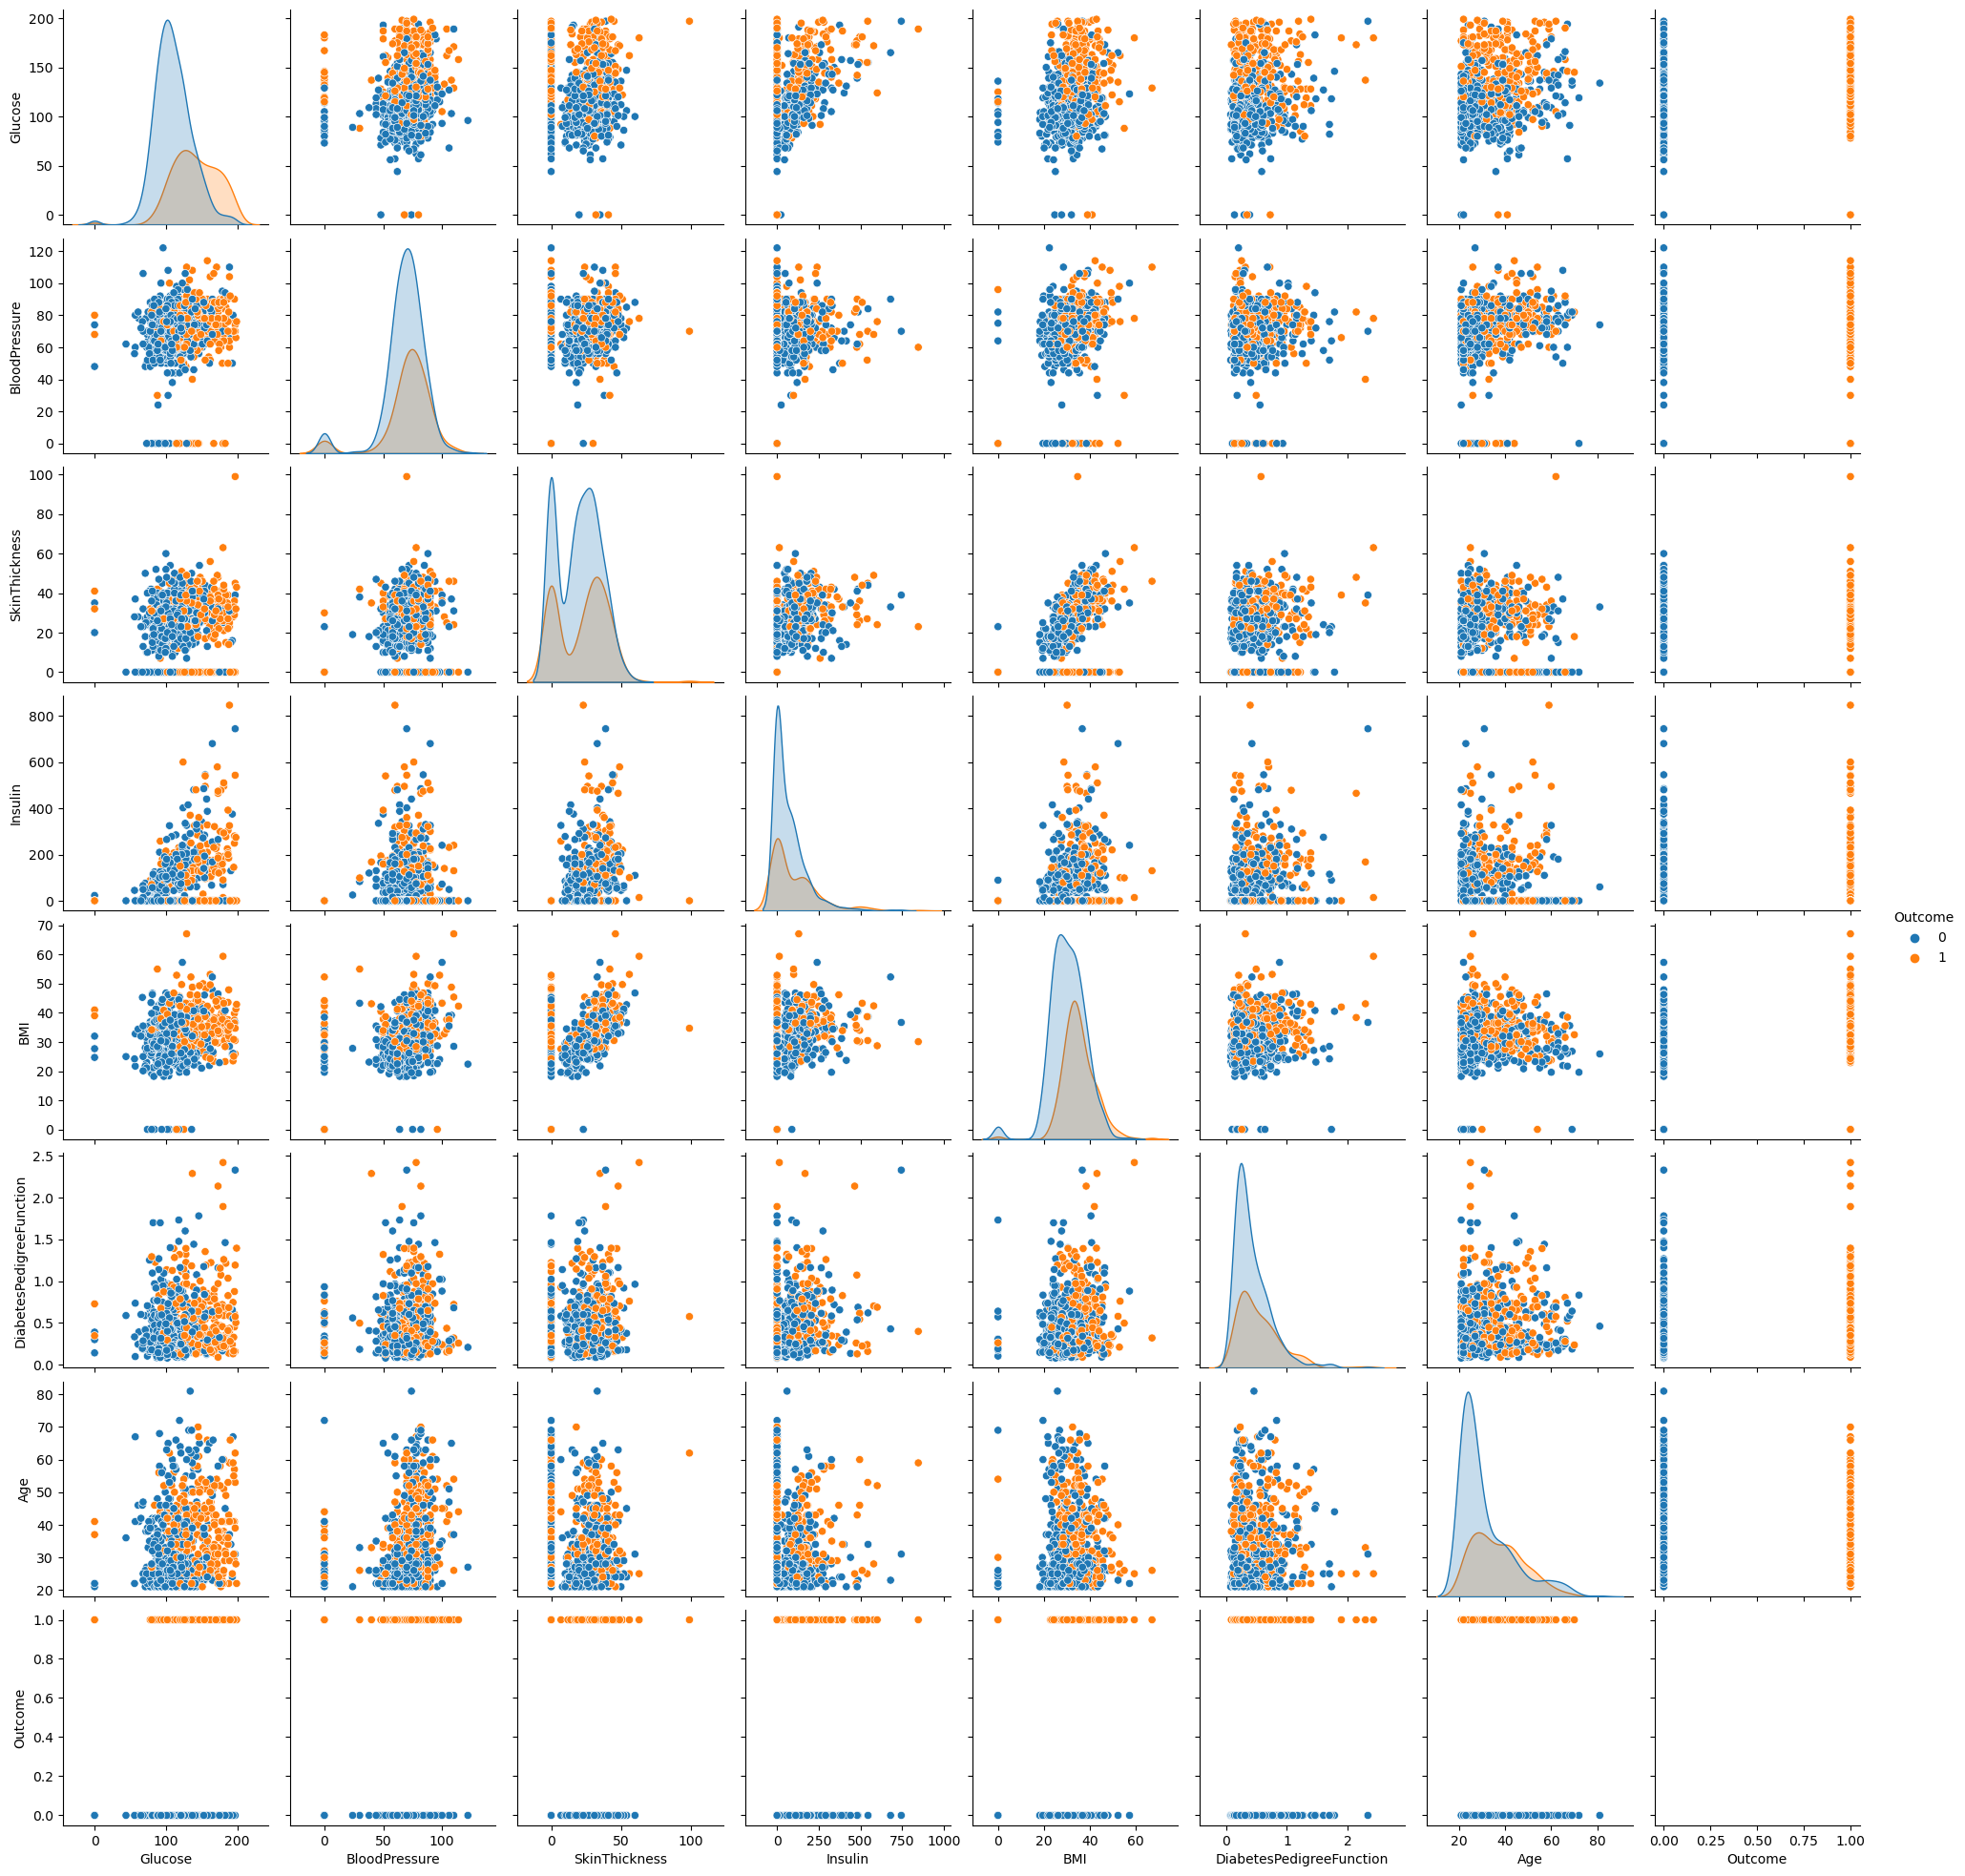

In [45]:
sns.pairplot(data, hue='Outcome',vars = data.columns[1:-1])

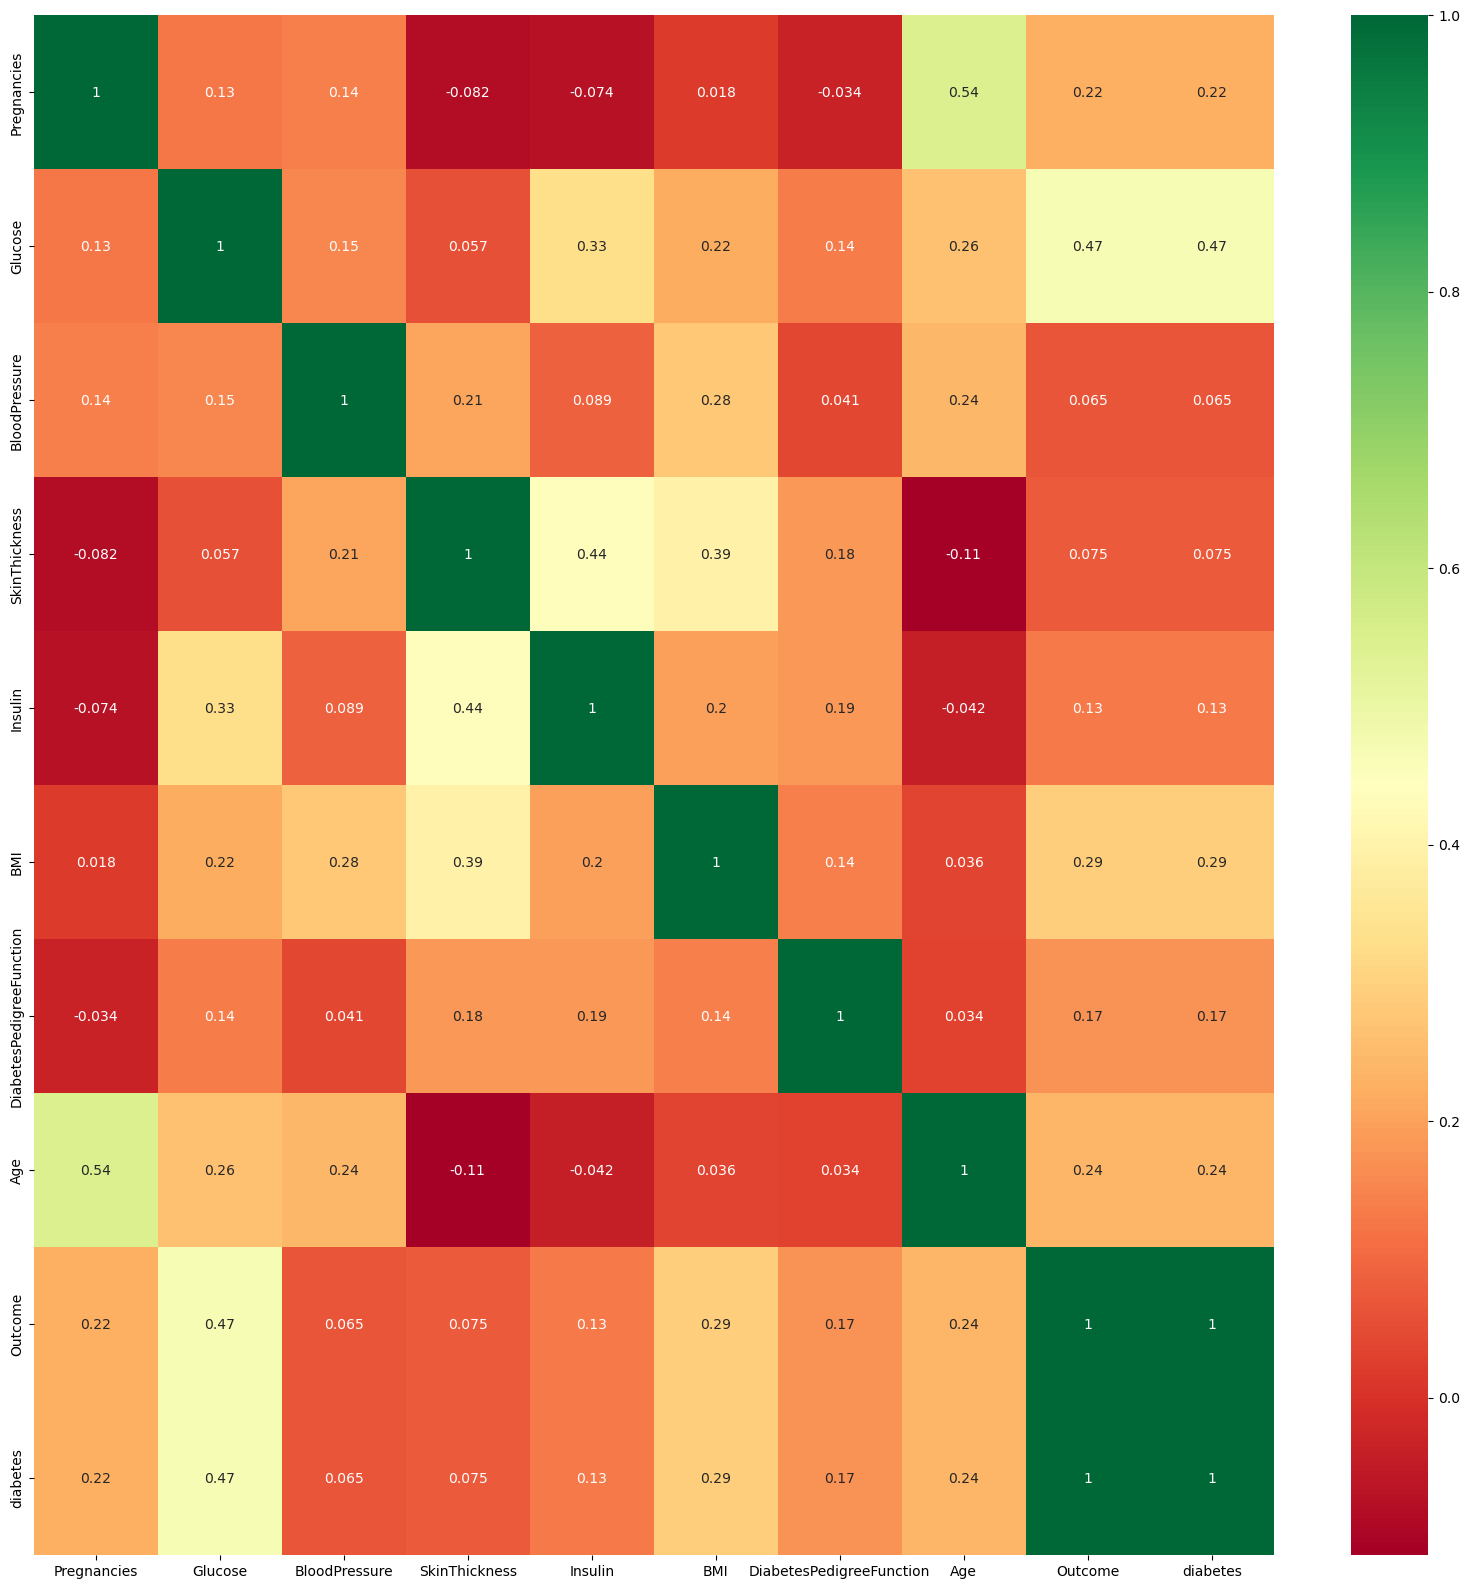

In [46]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\LAPTOP WORLD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

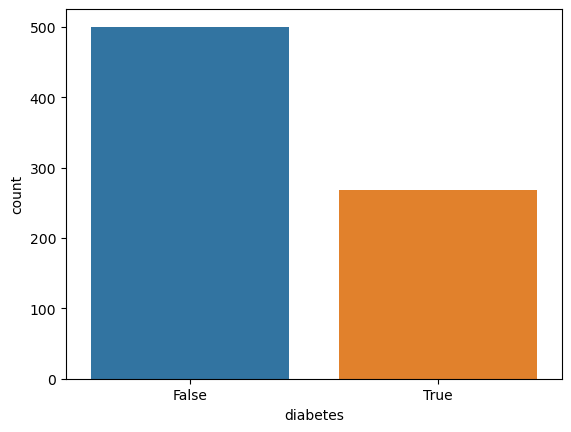

In [47]:
sns.countplot(data['diabetes'])   

In [48]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000


In [49]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [50]:
na_columns = ['Glucose','SkinThickness','Insulin','BMI','BloodPressure']
data[na_columns] = data[na_columns].replace(0,np.nan)

In [124]:
df = data.copy()

for column in ['Glucose','SkinThickness','Insulin']:
    median_0 = data[column][data['Outcome']==0].median()
    median_1 = data[column][data['Outcome']==1].median()
    
    df[column][df['Outcome']==0] = data[column][df['Outcome']==0].fillna(median_0)
    df[column][df['Outcome']==1] = data[column][df['Outcome']==1].fillna(median_1)

C:\Users\LAPTOP WORLD\AppData\Local\Temp\ipykernel_13244\2374956240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df['Outcome']==0] = data[column][df['Outcome']==0].fillna(median_0)
C:\Users\LAPTOP WORLD\AppData\Local\Temp\ipykernel_13244\2374956240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df['Outcome']==1] = data[column][df['Outcome']==1].fillna(median_1)


In [128]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,False
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,False
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,True


In [129]:
df.BloodPressure.fillna(df.BloodPressure.median(),inplace=True)
df.BMI.fillna(df.BMI.median(),inplace=True)

In [130]:
X=df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,False
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,False
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,True


In [145]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

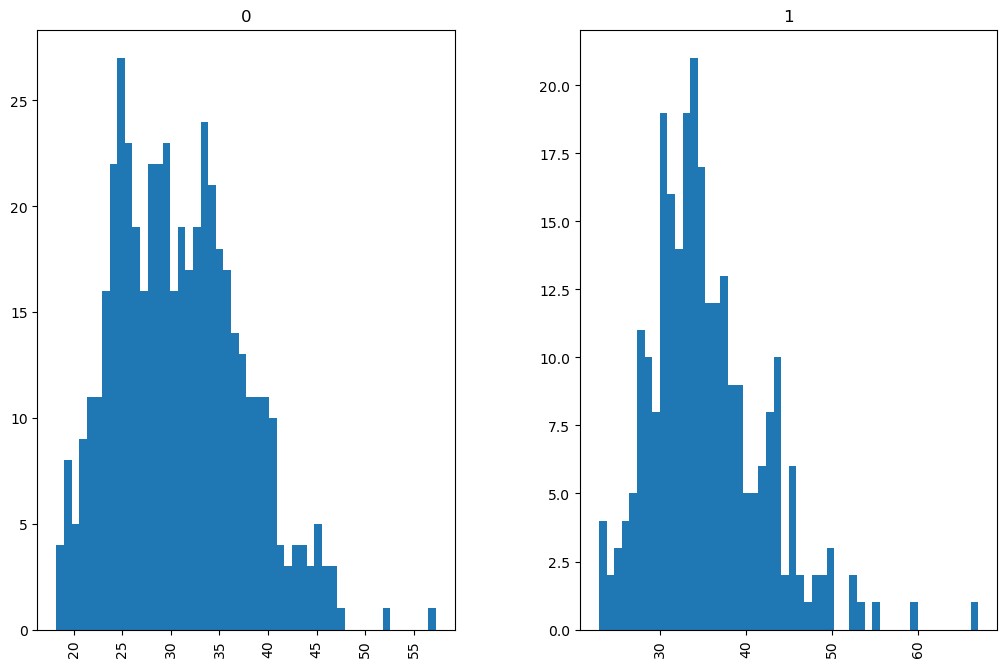

In [146]:
data.hist(column='BMI',bins=50,by='Outcome',figsize=(12,8))

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

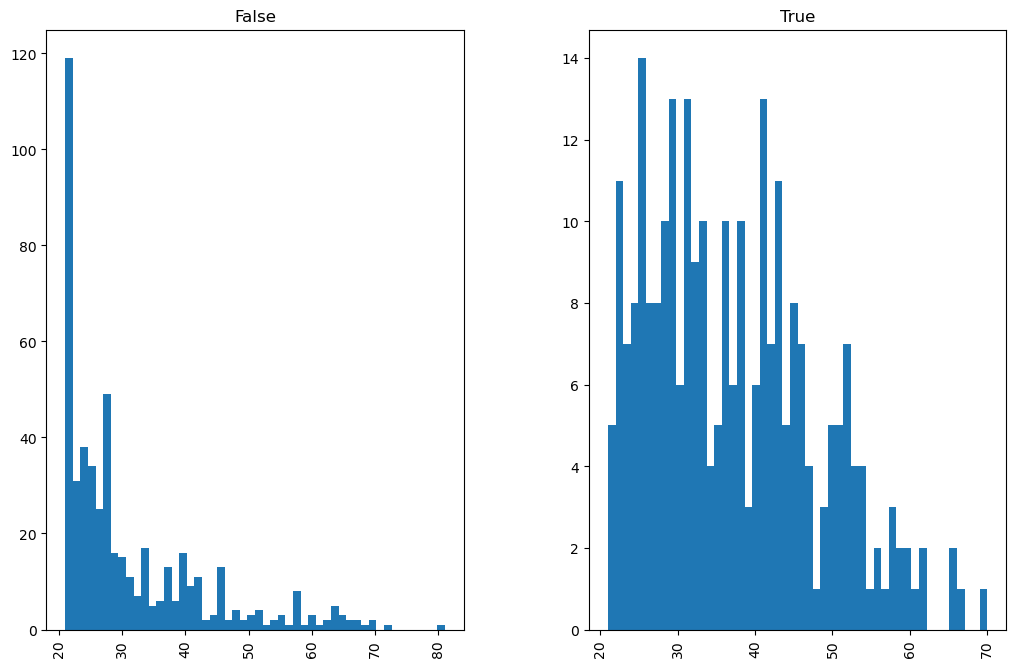

In [147]:
data.hist(column='Age',bins=50,by='diabetes',figsize=(12,8))

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

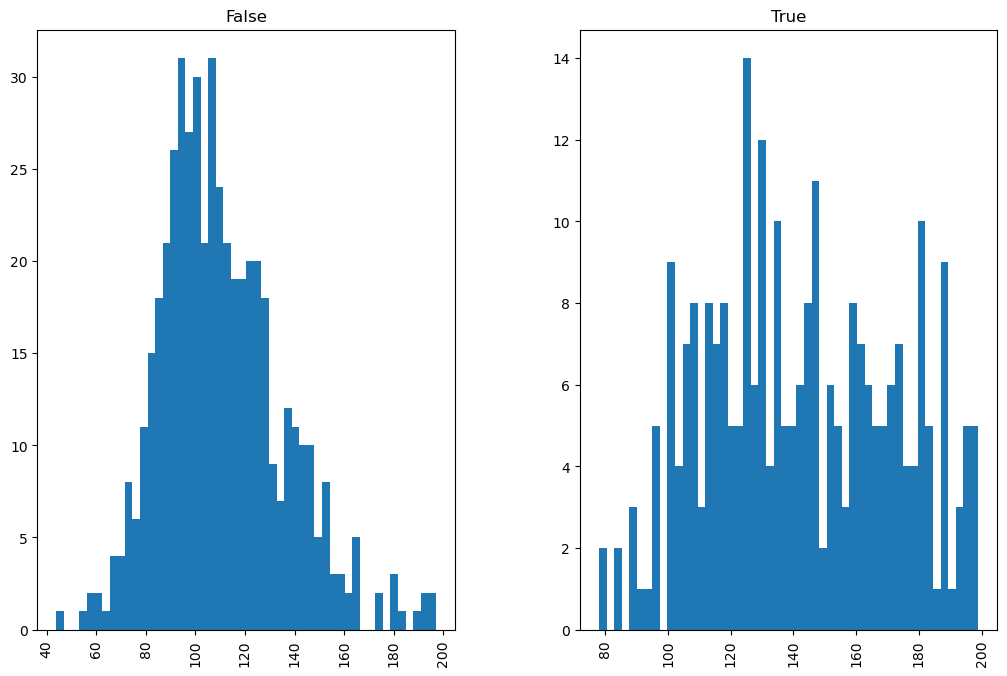

In [148]:
data.hist(column='Glucose',bins=50,by='diabetes',figsize=(12,8))

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

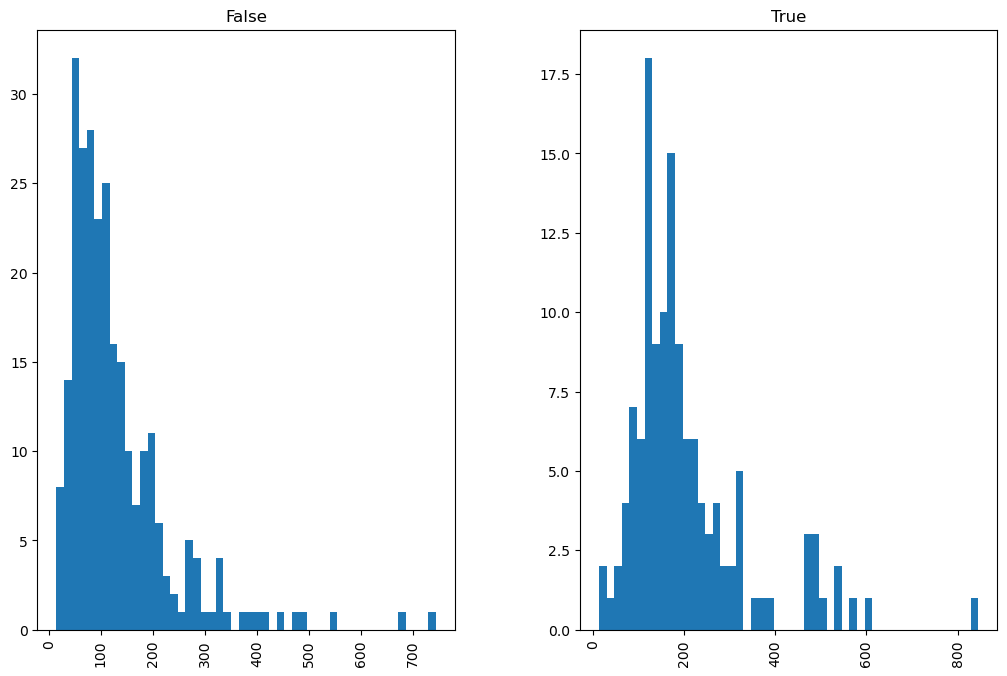

In [149]:
data.hist(column='Insulin',bins=50,by='diabetes',figsize=(12,8))

In [204]:
from sklearn import metrics
f1 = metrics.make_scorer(metrics.f1_score)
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
auc = metrics.make_scorer(metrics.roc_auc_score)

In [205]:
scoring = {
    "accuracy":accuracy,
    "precision":precision,
    "recall": recall,
    "f1":f1,
}

In [206]:
def printResults(cv):
    print("Accuracy  {:.3f} ({:.3f})".format(cv["test_accuracy"].mean(), cv["test_accuracy"].std()))
    print("Precision {:.3f} ({:.3f})".format(cv["test_precision"].mean(), cv["test_precision"].std()))
    print("Recall    {:.3f} ({:.3f})".format(cv["test_recall"].mean(), cv["test_recall"].std()))
    print("F1        {:.3f} ({:.3f})".format(cv["test_f1"].mean(), cv["test_f1"].std()))

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [208]:
gbc = GradientBoostingClassifier()

In [209]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [210]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [211]:
y_pred = gbc.predict(X_test)

In [212]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        71

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



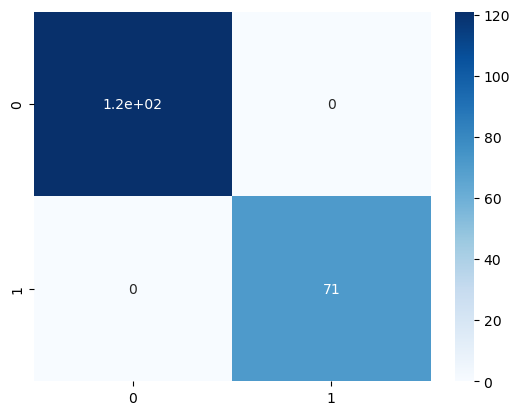

In [213]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [214]:
cv_gbc = cross_validate(gbc, X, y, scoring=scoring, cv=5)

In [215]:
printResults(cv_gbc)

Accuracy  1.000 (0.000)
Precision 1.000 (0.000)
Recall    1.000 (0.000)
F1        1.000 (0.000)


In [216]:
params = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [100,200,300,400,500,600,700,800,800,1000],
}
gs = GridSearchCV(estimator = gbc,param_grid=params,cv=5)

In [217]:
gs.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 800, 1000]})

In [218]:
gs.best_score_

1.0

In [219]:
gs.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}

In [220]:
gbc_best = GradientBoostingClassifier(learning_rate=0.1,loss='deviance',n_estimators=400)

In [221]:
gbc_best.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=400)

In [222]:
y_pred = gbc_best.predict(X_test)

In [223]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        71

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



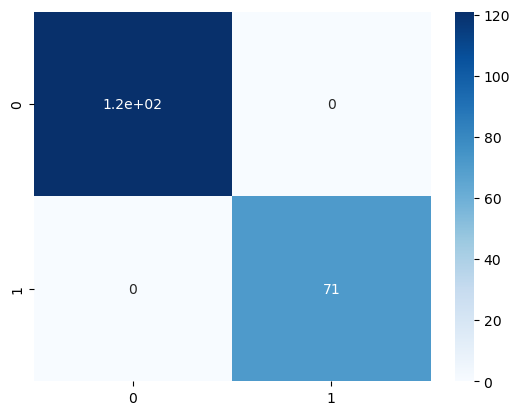

In [224]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [225]:
cv_gbc_best = cross_validate(gbc_best, X, y, cv=5, scoring=scoring)

In [226]:
printResults(cv_gbc_best)

Accuracy  1.000 (0.000)
Precision 1.000 (0.000)
Recall    1.000 (0.000)
F1        1.000 (0.000)


In [227]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(gbc_best, X, y,cv = 10)
#cv is the number of folds you want your training set to split in

In [228]:
import pickle

filename = 'diabetes-model.pkl'
pickle.dump(gbc_best,open(filename,'wb'))